In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('nyc-rolling-sales.csv', encoding='utf-8')
df_old_size = df.shape[0]

In [17]:
df.isnull().any()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [19]:
from sklearn.experimental import enable_iterative_imputer


df = df[df['NEIGHBORHOOD'] != ' ']
df = df[df['BUILDING CLASS CATEGORY'] != ' ']
df = df[df['TAX CLASS AT PRESENT'] != ' ']
df = df[df['BUILDING CLASS AT PRESENT'] != ' ']
df = df[df['ADDRESS'] != ' ']
#del['APARTMENT NUMBER']
df = df[df['LAND SQUARE FEET'] != ' ']
df = df[df['GROSS SQUARE FEET'] != ' ']
#del df['EASE-MENT']

df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

columns = ['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'EASE-MENT','ADDRESS', 'BUILDING CLASS AT TIME OF SALE']
del df['ZIP CODE']
del df['APARTMENT NUMBER']
del df['NEIGHBORHOOD']
for c in columns:
    df[c] = pd.factorize(df[c])[0]

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce').apply(lambda x: x.timestamp())

df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

myImputer1=enable_iterative_imputer. IterativeImputer()
X1 = df.copy(deep=True)
myImputer1.fit(X1)
df1 = myImputer1.transform (X1)
df1 = pd.DataFrame(df1,columns = df.columns)


df = df1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83810 entries, 0 to 83809
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      83810 non-null  float64
 1   BOROUGH                         83810 non-null  float64
 2   BUILDING CLASS CATEGORY         83810 non-null  float64
 3   TAX CLASS AT PRESENT            83810 non-null  float64
 4   BLOCK                           83810 non-null  float64
 5   LOT                             83810 non-null  float64
 6   EASE-MENT                       83810 non-null  float64
 7   BUILDING CLASS AT PRESENT       83810 non-null  float64
 8   ADDRESS                         83810 non-null  float64
 9   RESIDENTIAL UNITS               83810 non-null  float64
 10  COMMERCIAL UNITS                83810 non-null  float64
 11  TOTAL UNITS                     83810 non-null  float64
 12  LAND SQUARE FEET                

array([[<Axes: title={'center': 'SALE PRICE'}>]], dtype=object)

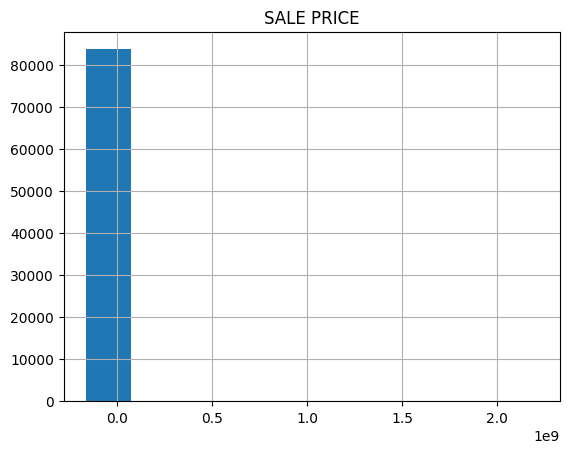

In [20]:
df.hist(['SALE PRICE'])

array([[<Axes: title={'center': 'SALE PRICE'}>]], dtype=object)

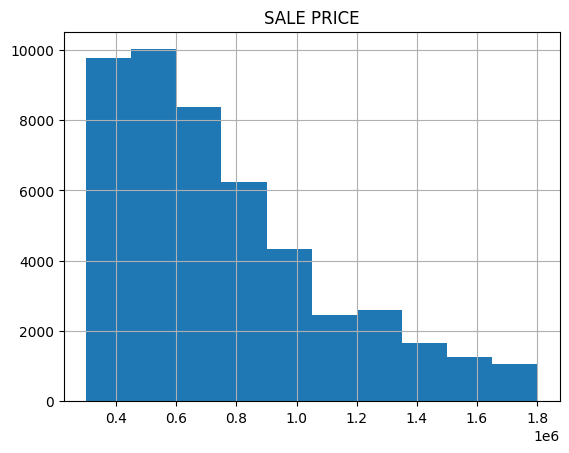

In [21]:
df = df[df['SALE PRICE'] < 1.8 * 10**6]
df = df[df['SALE PRICE'] > 0.3 * 10**6]
df.hist(['SALE PRICE'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47775 entries, 2 to 83807
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      47775 non-null  float64
 1   BOROUGH                         47775 non-null  float64
 2   BUILDING CLASS CATEGORY         47775 non-null  float64
 3   TAX CLASS AT PRESENT            47775 non-null  float64
 4   BLOCK                           47775 non-null  float64
 5   LOT                             47775 non-null  float64
 6   EASE-MENT                       47775 non-null  float64
 7   BUILDING CLASS AT PRESENT       47775 non-null  float64
 8   ADDRESS                         47775 non-null  float64
 9   RESIDENTIAL UNITS               47775 non-null  float64
 10  COMMERCIAL UNITS                47775 non-null  float64
 11  TOTAL UNITS                     47775 non-null  float64
 12  LAND SQUARE FEET                

In [23]:
x = df.loc[:, df.columns != 'SALE PRICE']
y = df['SALE PRICE']
train_points, test_points, train_values, test_values = train_test_split(x, y, random_state=104, test_size=0.1, shuffle=False, stratify=None)

In [24]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
test_predict_rf = rf_model.predict(test_points)
print(mean_absolute_error(test_values, test_predict_rf))

195428.93754602154


In [25]:
x = df.loc[:, df.columns != 'SALE PRICE']
y = df['SALE PRICE']
train_points, test_points, train_values, test_values = train_test_split(x, y, random_state=104, test_size=0.1, shuffle=False, stratify=None)

In [26]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.4, learning_rate = 0.1,
                max_depth = 30, alpha = 0, n_estimators = 30)
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)
print(mean_absolute_error(test_values, xgb_predict))

155805.83399454993


Text(0, 0.5, 'Предсказанная цена')

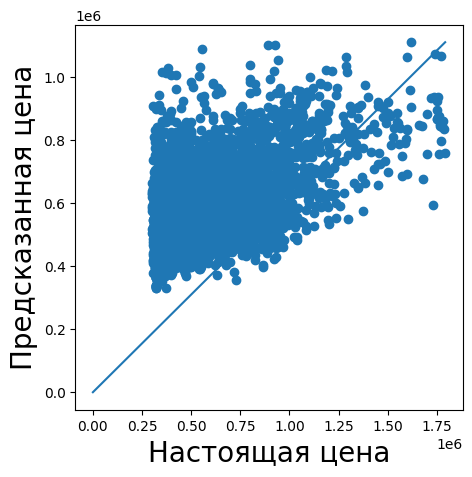

In [27]:
plt.figure(figsize=(5, 5))
plt.scatter(test_values, xgb_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(xgb_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)